In [1]:
from utils.paths import *
from utils.dataset import *

import plotly.express as px

In [42]:
gps_coords = 46.5026174, 8.3203729
grid_size = 10
radius = 10000
path = '/Users/george-birchenough/sunmap_rasters/Switzerland_DEM_10m.tif'

array, observer_pixel, observer_height = get_masked_data(gps_coords, radius, grid_size, path)

In [20]:
array.shape

(1, 120, 201)

In [168]:

nrows,ncols = array.shape[1:]
x = np.arange(nrows)
y = np.arange(ncols)
xy_points = ( x, y )

array_cartesian = np.flip(array[0,:,:], axis=0)

observer_x = observer_pixel[1]
observer_y = array.shape[1] - observer_pixel[0]

angular_resolution = 1000 # / 360 deg
pixels = radius / grid_size 
peak = []
bearing_rad = np.linspace(0, np.pi * 2 , angular_resolution)
peaks_df = pd.DataFrame()
forepeaks_df = pd.DataFrame()

for i, bearing_rad_ in enumerate( bearing_rad ):
    step = np.arange(pixels)
    x_vector = np.cos(bearing_rad_)
    y_vector = np.sin(bearing_rad_)
    x_sample =  observer_x + step * x_vector
    y_sample =  observer_y + step * y_vector

    inter_points = np.dstack((x_sample,y_sample)).squeeze(axis = 0)

    heights = interpn(xy_points, array_cartesian, inter_points, \
                method = 'linear', bounds_error = False, fill_value = observer_height )   \
                    - observer_height
    distances = step * grid_size # in metres
    elevations = np.arctan( heights / distances ) * 180/np.pi

    bearing = bearing_rad_ * 180/np.pi

    peak_elevations = list( (find_peaks( elevations, height = 0, prominence = 2 ))[1]['peak_heights'] )

    max_elevation = max( peak_elevations) 

    peak_elevation_index = peak_elevations.index(max_elevation)

    plotting_elevations = peak_elevations[:peak_elevation_index]

    d1 = { 'bearing':[bearing], 'peak_angle':[max_elevation]}
    peaks_df_ = pd.DataFrame.from_dict(d1)
    d2 = { 'forepeak_angle_' + str(i): [plotting_elevations[i]] for i in np.arange(len(plotting_elevations))}
    d2['bearing'] = [bearing]
    # d2['index'] = [0]
    forepeaks_df_ = pd.DataFrame.from_dict(d2)
    # d3 = {**d1, **d2}
    # df_ = pd.DataFrame.from_dict(d3)
    peaks_df = pd.concat([peaks_df, peaks_df_], axis = 0)
    forepeaks_df= pd.concat([forepeaks_df, forepeaks_df_])
    # peak.append(peak_angle)

peaks_df.reset_index(drop = True, inplace = True)
forepeaks_df.set_index('bearing', inplace = True)
# df = pd.DataFrame()
# df['bearing_rad'] = bearing_rad
# df['bearing_deg'] = bearing_rad * 180/np.pi
# df['peak_angle'] = np.array(peak) * 180/np.pi
# df.loc[df.peak_angle < 0, 'peak_angle'] = 0

# df['horizon'] = 0

/Users/george-birchenough/opt/anaconda3/envs/solmap/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


In [169]:
forepeaks_df

,forepeak_angle_0,forepeak_angle_1,forepeak_angle_2
bearing,,,
0.000000,NaN,NaN,NaN
0.360360,NaN,NaN,NaN
0.720721,NaN,NaN,NaN
1.081081,NaN,NaN,NaN
1.441441,NaN,NaN,NaN
...,...,...,...
358.558559,NaN,NaN,NaN
358.918919,NaN,NaN,NaN
359.279279,NaN,NaN,NaN


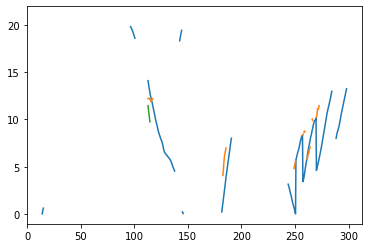

In [170]:
plt.plot(forepeaks_df)

In [137]:
d3['index '] = [0]
d3
pd.DataFrame.from_dict(d3)

,index,bearing,peak_angle,forepeak_angle_0,index
0,0,0.0,0.113206,0.063544,0


In [97]:
from scipy.signal import find_peaks
peak_elevations = list( (find_peaks( elevations, height = 0 ))[1]['peak_heights'] )

max_elevation = max( peak_elevations) 

peak_elevation_index = peak_elevations.index(max_elevation)

plotting_elevations = peak_elevations[:peak_elevation_index]


In [100]:
max_elevation

0.11320648193359376

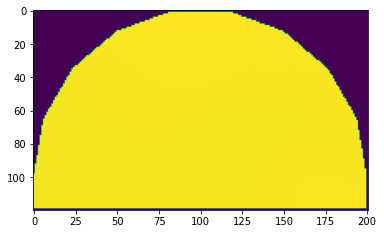

In [35]:
plt.imshow(array_cartesian)

In [33]:
array[0,:,:]

array([[-32767.    , -32767.    , -32767.    , ..., -32767.    ,
        -32767.    , -32767.    ],
       [  1345.5   ,   1345.6   ,   1345.6   , ...,   1757.2001,
          1756.4   , -32767.    ],
       [  1345.5   ,   1345.6   ,   1345.9   , ...,   1753.2001,
          1752.1   , -32767.    ],
       ...,
       [-32767.    , -32767.    , -32767.    , ..., -32767.    ,
        -32767.    , -32767.    ],
       [-32767.    , -32767.    , -32767.    , ..., -32767.    ,
        -32767.    , -32767.    ],
       [-32767.    , -32767.    , -32767.    , ..., -32767.    ,
        -32767.    , -32767.    ]], dtype=float32)

In [ ]:
nrows,ncols = array.shape
x = np.arange(nrows)
y = np.arange(ncols)
points = (x, y)

array_cartesian = np.flip(array, axis=0)
radius = 8000 # m
n_steps = 100
slices = []
inter_points = []
df = pd.DataFrame()
for i in x:
    step = np.linspace(0, radius/grid_size, n_steps)
    x_sample =  i + step * x_vector
    y_sample =  step * -1 * y_vector
    inter_points = np.dstack((x_sample,y_sample)).squeeze(axis = 0)
    slice = interpn(points, array_cartesian, inter_points, method = 'linear', bounds_error = False, fill_value = 0 )
    df = pd.concat([df, get_shadows(slice, inter_points, el_vector)])

In [11]:
x = .89 * 1000
h = 1900

def find_el ( x, h):
    y = h - 1407
    el = np.arctan( y / x ) * 180 / np.pi
    return el

find_el(x, h )

28.983497201581624

In [28]:
def add_trace():
    # path = '/Users/george-birchenough/ASTGTM_Himalaya/interp_tests/N30E086_10m_cubicspline.tif'
    array, observer_pixel, observer_height  = get_square_masked_data(gps_coords, radius, grid_size, path)
    y = array[0, observer_pixel[0], :]
    x = np.arange(0, 2*radius+grid_size, grid_size)
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode="lines",
            )
    )
    fig.update_layout(dict(
        yaxis = dict(autorange = True)
    ))
    array = array[0,:,:]
    return array

fig = px.line()



In [29]:
gps_coords = 28.699405553574277, 83.49374394828561
# global radius, grid_size
radius = 1000
grid_size = 20
# path = '../ASTGTM_Himalaya/interp_tests/N30E086_10m_bilinear.tif'
# path = '../ASTGTM_Himalaya/interp_tests/N30E086_2m_cubicspline.tif'
path = '/Users/george-birchenough/sunmap_rasters/Himalaya_DEM_20m_bilinear.tif'
array = add_trace()
fig.show()

In [30]:
z = array
x = np.arange(0, 2*radius+grid_size, grid_size)
y = x[::-1]

slope_array = np.gradient(z)
slope = ( ( np.array( slope_array[0]) **2 + np.array( slope_array[1]) **2 ) ** 0.5 ) / grid_size
slope = np.arctan(slope) * 180 / np.pi
slope.max()

76.64375

In [31]:
range = slope.max() - slope.min()

discrete_angles = np.array( [slope.min(), 30, 35, 40, 45, 50, 55, slope.max()] )

norm_intervals = ( discrete_angles - slope.min() ) / range

map = [(slope.min(),'white'), (30,'white'), (35,'#F0E54D'), (40,'#E4773B'), (45, '#CC2D5C'), (50, '#BF8CB8'), (55, '#524691'), (60, '#8BC4BF'),  (90, '#1D1D1B')]

mapless = []
for i in np.arange(len(map)):
    if map[i][0] < slope.max():
        mapless.append([ map[i][0], map[i][1] ] )
        largest_index = i

mapless.append( [slope.max(), map[largest_index][1]] )


dcolors = []
for i in np.arange(len(mapless)):
    try:
        dcolors.append( [ (mapless[i][0]-slope.min())/range  , mapless[i][1] ] )
        dcolors.append( [ (mapless[i][0]-slope.min())/range  , mapless[i+1][1] ] )
    # print( i[0],i[1] )
    except:
        pass

In [32]:
fig = go.Figure( )

fig.add_trace( dict(
        type = 'contour',
        z=z,
        x=x,
        y=y,
        contours = dict(
            start = z.min().round(100),
            end = z.max().round(100),
            size = 50,
            coloring = 'none',
            showlabels = True,
        ),
        showlegend = False,
    ))

fig.add_trace( dict(
        type = 'contour',
        z=z,
        x=x,
        y=y,
        contours = dict(
            start = z.min().round(10),
            end = z.max().round(10),
            size = 10,
            coloring = 'none',
            ),
        showlegend = False,
    ))

slope.min()

fig.add_trace( dict(
        type = 'heatmap',
        z = slope,
        x=x,
        y=y,
        colorscale = dcolors,
        opacity = 0.5
        # contours = dict(
        #     start = array.min().round(10),
        #     end = array.max().round(10),
        #     size = 10,
        #     coloring = 'none',
        #     )
    ))

fig.update_layout(
    autosize = False,
    height = 800,
    width = 800,
    yaxis = dict(
            scaleanchor = 'x',
            scaleratio = 1
    ),
    xaxis = dict(
        range = [0, 2*radius]
    )
)

fig.show()

/Users/george-birchenough/opt/anaconda3/envs/solmap/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning:

overflow encountered in multiply

/Users/george-birchenough/opt/anaconda3/envs/solmap/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

overflow encountered in multiply



In [33]:
nrows,ncols = array.shape
x = np.arange(nrows)
y = np.arange(ncols)
points = (x, y)

array_cartesian = np.flip(array, axis=0)
radius = 8000 # m
n_steps = 100
# x_vector, y_vector = get_azimuth_vector(azimuth)
x_vector = 1
y_vector = 0
slices = []
inter_points = []
df = pd.DataFrame()
step = np.linspace(0, radius/grid_size, n_steps)
x_sample =  x_zero + step * x_vector
y_sample =  y_zero + step * -1 * y_vector
inter_points = np.dstack((x_sample,y_sample)).squeeze(axis = 0)
slice = interpn(points, array_cartesian, inter_points, method = 'linear', bounds_error = False, fill_value = 0 )

NameError: name 'x_zero' is not defined

In [ ]:
def get_df_lists(gps_coords, radius, grid_size):
    print('Getting geometry')
    array, observer_pixel, observer_height  = get_masked_data(gps_coords, radius, grid_size)

    peaks_df = get_peaks( array, observer_pixel, observer_height, radius, grid_size)
    global mdf_list
    global tdf_list
    global amdf_list 
    mdf_list, tdf_list, amdf_list  = [], [], []
    for month in np.arange(1,13):
        # td = datetime.timedelta(days = interval)
        # final_date = start_date + n_intervals * td
        year = 2021
        day = 1
        date = {'year':year,'month':month,'day':day}
        date = datetime.date(year = date['year'], month = date['month'], day = date['day'])
        mdf_,tdf_,amdf_  = get_data(gps_coords, observer_height, peaks_df, date)
        mdf_list.append(mdf_)
        tdf_list.append(tdf_)
        amdf_list.append(amdf_)
    # return mdf_list, tdf_list, amdf_list 

def make_solmap(month): 
    mdf = mdf_list[month-1]
    tdf = tdf_list[month-1]

    peak_lines = dict(
                    type = 'scatter',
                    name = 'peaks_' + str(month),
                    x = mdf.bearing,
                    y = mdf.peak_angle,
                    line = dict(color = 'gold'),
                    mode = 'none',
                    stackgroup = 'sun',
                    fillcolor = 'black'
                    # fill = 'tozeroy'
                    )
    diff_lines = dict(
                    type = 'scatter',
                    name = 'el_diff' + str(month),
                    x = mdf.bearing,
                    y = mdf.el_diff,
                    line = dict(color = 'gold'),
                    mode = 'none',
                    stackgroup = 'sun',
                    fillcolor = 'gold'
                    # fill = 'tozeroy'
                    )
    sun_line = dict(
                    type = 'scatter',
                    name = 'daylight_' + str(month),
                    x = mdf.loc[ mdf.daylight == 'day' ].bearing,
                    y = mdf.loc[ mdf.daylight == 'day' ].elevation,
                    line = dict(
                        color = 'white',
                        width = 0.5),
                )
    
    ticks, annotations = get_annotations(tdf, month)

    pio.templates.default = "simple_white"

    fig = go.Figure()

    fig.add_traces([
        peak_lines,
        diff_lines,
        sun_line,
    ])
    fig.add_traces(
        ticks
    )
    max_y = max( [ max( [mdf_.elevation.max(), mdf_.peak_angle.max()] ) for mdf_ in mdf_list ] )

    fig.update_layout( 
        annotations = annotations,
        xaxis = dict(
            tickmode = 'array',
            tickvals = [0, 22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315, 337.5, 360] ,
            ticktext = ['N', 'ENE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NWN', 'N'],
            range = [45, 315],
        ),
        yaxis = dict(
            range = [0, max_y],
            anchor = 'free',
            position = 0.5,
            visible = False,
            scaleanchor = 'x',
            scaleratio = 0.6
        ),
        showlegend=False,
        autosize=True,
        height=600,
        # margin={'t': 50},
        # margin=dict(
        #     l=50,
        #     r=50,
        #     b=100,
        #     t=100,
        #     pad=4
        # ),
        paper_bgcolor="white",
        font = dict( family = 'verdana', size = 12 )
    )
    return fig

def get_annotations(tdf, month):
    annotations = []
    ticks = []
    gdf = tdf.loc[tdf.elevation > 0].groupby('time')
    for hour, df in gdf:
        df = df.sort_values('date').reset_index()
        # print(df.head)
        x = float( df['azimuth' ] )
        y = float( df['elevation' ] )
        text = hour
        grad = float( df.grad )
        ticks.append(dict(
            type = 'scatter',
            name = 'tick_' + str(month),
            x=[ x, x + 2 * grad],
            y=[ y, y - 2] ,
            line = dict( color="white", width=1), 
            # fill = 'toself',
            marker = None,
            mode = 'lines',
        ))
        
        # markers.append(make_marker_dict(x,y,hour))
        annotations.append( dict(
            name = 'label_' + str(month),
            text = str(text) + ':00',
            x = x,
            y = y,
            xanchor = 'center',
            yanchor = 'middle',
            xshift = 15 * grad,
            yshift = -20,
            showarrow = False,
            font = dict(color = 'white'),
            opacity = 1
        )    )
    return ticks, annotations

gps_coords = 28.00603682759103, 86.8527006361936
# global radius, grid_size
radius = 15000
grid_size = 20
get_df_lists(gps_coords, radius, grid_size)
fig = make_solmap(6, 1)

fig.show()